# **PHÂN TÍCH KHÁM PHÁ DỮ LIỆU**

## **THỐNG KÊ MÔ TẢ**

### **ÔN TẬP LÝ THUYẾT**

### **BÀI LÀM MẪU**

**Bài toán 1**: Thực hiện các nhiệm vụ trong bài toán 1 để làm quen với các thao tác cần làm để khám phá dữ liệu

**Nhiệm vụ 1: Khám phá dữ liệu COVID**: lấy tại https://ourworldindata.org/coronavirus

1. Tính mean, median, mode, variance, standard deviation, range, percentile, quartile, interquartile range (IQR) sử dụng thư viện numpy và stats trên tập dữ liệu COVID.

**Import thư viện** 

In [1]:
# Import thư viện
import numpy as np
import pandas as pd
from scipy import stats

**Đọc dữ liệu từ file CSV**

In [43]:
# Đọc dữ liệu từ file CSV
covid_data = pd.read_csv("data/covid-data.csv")

**Lấy các cột cần thiết**

In [44]:
# Lấy các cột cần thiết
covid_data = covid_data[['code','continent','country','date','total_cases','new_cases']]

Ý nghĩa của từng cột:
1. `code`  
Ý nghĩa: Mã quốc gia ISO (3 ký tự)  
Ví dụ: AFG (Afghanistan), USA (United States), VNM (Vietnam)  
Mục đích: Định danh duy nhất cho mỗi quốc gia/vùng lãnh thổ  
2. `continent`  
Ý nghĩa: Tên lục địa  
Ví dụ: Asia, Europe, North America, Africa, South America, Oceania  
Mục đích: Phân loại dữ liệu theo khu vực địa lý lớn  
3. `country`  
Ý nghĩa: Tên đầy đủ của quốc gia/vùng lãnh thổ  
Ví dụ: Afghanistan, Vietnam, United States, Germany  
Mục đích: Hiển thị tên quốc gia dễ đọc cho con người  
4. `date`  
Ý nghĩa: Ngày ghi nhận dữ liệu  
Định dạng: YYYY-MM-DD (ví dụ: 2020-01-01)  
Mục đích: Theo dõi diễn biến theo thời gian  
5. `total_cases`  
Ý nghĩa: Tổng số ca nhiễm COVID-19 tích lũy đến ngày đó  
Đơn vị: Số ca  
Mục đích: Xem tổng quan mức độ lây lan tại mỗi quốc gia  
6. `new_cases`  
Ý nghĩa: Số ca nhiễm COVID-19 mới được ghi nhận trong ngày  
Đơn vị: Số ca  
Mục đích: Theo dõi tốc độ lây lan hàng ngày  


**Xem thông tin sơ bộ**

In [46]:
# Xem trước 5 dòng dữ liệu
covid_data.head(5)

,code,continent,country,date,total_cases,new_cases
0,AFG,Asia,Afghanistan,2020-01-01,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-02,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-03,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0
4,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0


In [47]:
# Xem kiểu dữ liệu của các cột
covid_data.dtypes

code            object
continent       object
country         object
date            object
total_cases    float64
new_cases      float64
dtype: object

In [48]:
# Xem kích thước dữ liệu
covid_data.shape

(530292, 6)

=> 530292 hàng, 6 cột

**Các thống kê cơ bản với cột `new_cases`**

**Tại sao lại làm thống kê cơ bản với cột `new_cases` mà không phải các cột khác?**

- Cột `new_cases` (số ca nhiễm mới mỗi ngày) là chỉ số động, phản ánh trực tiếp tốc độ lây lan của dịch COVID-19 theo thời gian. Đây là biến quan trọng nhất để theo dõi, dự báo và đánh giá tình hình dịch bệnh.
- Các thống kê cơ bản như mean, median, mode, variance, v.v. giúp hiểu rõ hơn về xu hướng, sự biến động, mức độ bất thường của số ca nhiễm mới – từ đó hỗ trợ ra quyết định phòng chống dịch.
- Các cột khác như `total_cases` (tích lũy), `country`, `date`, `code`, `continent` chủ yếu mang tính định danh, phân loại hoặc tích lũy, không phản ánh sự thay đổi hàng ngày nên không phù hợp để phân tích thống kê động.
- Nếu muốn phân tích sâu hơn, có thể áp dụng thống kê cho từng nhóm (theo quốc gia, lục địa, v.v.) hoặc các chỉ số khác, nhưng với mục tiêu khám phá tổng quan thì `new_cases` là lựa chọn hợp lý nhất.

=> Thống kê cơ bản với `new_cases` giúp nắm bắt nhanh tình hình dịch bệnh và là bước khởi đầu quan trọng cho các phân tích sâu hơn.

- Trung bình (Mean)

In [8]:
# Trung bình (Mean) cho cột `new_cases`
data_mean = np.mean(covid_data['new_cases'])
print("Giá trị trung bình của new_cases:", data_mean)

Giá trị trung bình của new_cases: 10590.082678546372


=> Cho biết số ca trung bình mỗi ngày. Nhưng có thể bị ảnh hưởng mạnh bởi các ngày có ca tăng đột biến.

- Trung vị (Median)

In [9]:
# Trung vị (Median) cho cột `new_cases`

# Loại bỏ giá trị NaN trước khi tính toán
covid_data = covid_data.dropna(subset=['new_cases'])
# Tính trung vị
data_median = np.median(covid_data["new_cases"])
print("Giá trị trung vị của new_cases:", data_median)

Giá trị trung vị của new_cases: 0.0


=> Cho biết giá trị giữa => ít bị ảnh hưởng bởi giá trị ngoại lai. Dùng để hiểu xu hướng trung tâm khi dữ liệu lệch.

- Mode (Giá trị xuất hiện nhiều nhất)

In [10]:
# Mode (Giá trị xuất hiện nhiều nhất) cho cột `new_cases`

# Loại bỏ giá trị NaN trước khi tính mode
new_cases_clean = covid_data["new_cases"].dropna()
data_mode = stats.mode(new_cases_clean, keepdims=True)
print("Mode:", data_mode.mode[0], "Count:", data_mode.count[0])

Mode: 0.0 Count: 316034


=> Cho biết con số nào thường lặp lại nhất.


- Phương sai (Variance)

In [11]:
# Phương sai (Variance) cho cột `new_cases`
data_variance = np.var(covid_data["new_cases"])
print("Phương sai của new_cases:", data_variance)

Phương sai của new_cases: 13834902307.943613


=> Đo độ phân tán của dữ liệu (khoảng cách giữa các giá trị so với trung bình)

- Đo lệch chuẩn (Standard Deviation)

In [12]:
# Đo lệch chuẩn (Standard Deviation) cho cột `new_cases`
data_sd = np.std(covid_data["new_cases"])
print("Đo lệch chuẩn của new_cases:", data_sd)

Đo lệch chuẩn của new_cases: 117621.86152218308


=> Nếu std cao => số ca thay đổi bất thường, dịch diễn biến khó lường.

- Giá trị nhỏ nhất và lớn nhất

In [13]:
data_max = np.max(covid_data["new_cases"])
data_min = np.min(covid_data["new_cases"])
print("Giá trị lớn nhất của new_cases:", data_max)
print("Giá trị nhỏ nhất của new_cases:", data_min)

Giá trị lớn nhất của new_cases: 8401906.0
Giá trị nhỏ nhất của new_cases: 0.0


=> Cho thấy sự chênh lệch giữa ngày có số ca nhiều nhất và ít nhất.

- Phân vị (Percentile)

In [14]:
# Phân vị (Percentile) cho cột `new_cases`
data_percentile = np.percentile(covid_data["new_cases"],60)
print("Giá trị phân vị 60 của new_cases:", data_percentile)

Giá trị phân vị 60 của new_cases: 0.0


Tìm giá trị tại vị trí 60% khi sắp xếp dữ liệu tăng dần.  
Ví dụ: 60th percentile cho biết 60% số ngày có ca mới ≤ giá trị này. Giúp hiểu phân bố dữ liệu.

- Tứ phân vị (Quartile)

In [15]:
# Tứ phân vị (Quartile) cho cột `new_cases`
data_quartile = np.quantile(covid_data["new_cases"],0.75)
print("Giá trị tứ phân vị 75 của new_cases:", data_quartile)

Giá trị tứ phân vị 75 của new_cases: 64.0


Tìm Q3 (tứ phân vị thứ 3, 75%).  
Có nghĩa 75% dữ liệu nhỏ hơn giá trị này.  
=> Q1, Q2, Q3 chia dữ liệu thành 4 phần bằng nhau. Dễ thấy 25%, 50%, 75% dữ liệu nằm ở đâu.

- Khoảng tứ phân vị (IQR)

In [16]:
# Khoảng tứ phân vị (IQR) cho cột `new_cases`
data_IQR = stats.iqr(covid_data["new_cases"])
print("Khoảng tứ phân vị (IQR) của new_cases:", data_IQR)

Khoảng tứ phân vị (IQR) của new_cases: 64.0


`IQR = Q3 - Q1`  
Là khoảng giữa 25% dữ liệu dưới và 25% dữ liệu trên.  
Dùng để phát hiện outliers (giá trị ngoại lai).  

**Kết luận về Correlation trong dữ liệu COVID-19:**

1. **Mối quan hệ giữa `total_cases` và `new_cases`:**
   - Có tương quan dương mạnh (thường > 0.8) vì `total_cases` là tích lũy của `new_cases`
   - Khi `new_cases` tăng liên tục → `total_cases` tăng nhanh
   - Khi `new_cases` giảm → tốc độ tăng của `total_cases` chậm lại

2. **Ý nghĩa thực tiễn:**
   - Correlation cao cho thấy sự nhất quán trong dữ liệu
   - Giúp dự báo xu hướng dịch bệnh
   - Hỗ trợ đánh giá hiệu quả các biện pháp phòng chống dịch

3. **Hạn chế:**
   - Chỉ có 2 biến số nên phân tích correlation đơn giản
   - Cần thêm các biến khác (dân số, mật độ, chính sách...) để có cái nhìn toàn diện hơn

**→ Tóm lại:** Correlation giữa 2 cột này chủ yếu mang tính toán học (tích lũy), cần bổ sung thêm các yếu tố khác để phân tích sâu hơn về COVID-19.

**Nhiệm vụ 2**: Khám phá và xử lý dữ liệu Marketing Campaign lấy tại
https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

**Import thư viện và nạp dữ liệu vào notebook**

In [62]:
# Import thư viện và nạp dữ liệu Marketing Campaign
import pandas as pd

In [63]:
# Đọc file với encoding phù hợp và bỏ ký tự tab nếu có
marketing_data = pd.read_csv('data/marketing_campaign.csv', sep=',')

In [64]:
# Lấy các cột cần thiết
marketing_data = marketing_data[['ID','Year_Birth', 'Education',
'Marital_Status','Income','Kidhome', 'Teenhome',
'Dt_Customer', 'Recency','NumStorePurchases',
'NumWebVisitsMonth']]

**Loại bỏ dữ liệu trùng lặp**

In [65]:
# Xem trước 5 dòng dữ liệu
marketing_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,4,7
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,2,5
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,10,4
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,4,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,6,5


In [66]:
# Loại bỏ dữ liệu trùng lặp
marketing_data_duplicate = marketing_data.drop_duplicates() 

In [67]:
# Xóa dòng có chỉ số 1
marketing_data.drop(labels=[1], axis=0)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,4,7
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,10,4
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,4,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,6,5
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,10,6
...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,4,5
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,5,7
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,13,6
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,10,3


In [68]:
# Xóa cột 'Year_Birth'
marketing_data.drop(labels=['Year_Birth'], axis=1)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumStorePurchases,NumWebVisitsMonth
0,5524,Graduation,Single,58138.0,0,0,04-09-2012,58,4,7
1,2174,Graduation,Single,46344.0,1,1,08-03-2014,38,2,5
2,4141,Graduation,Together,71613.0,0,0,21-08-2013,26,10,4
3,6182,Graduation,Together,26646.0,1,0,10-02-2014,26,4,6
4,5324,PhD,Married,58293.0,1,0,19-01-2014,94,6,5
...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,13-06-2013,46,4,5
2236,4001,PhD,Together,64014.0,2,1,10-06-2014,56,5,7
2237,7270,Graduation,Divorced,56981.0,0,0,25-01-2014,91,13,6
2238,8235,Master,Together,69245.0,0,1,24-01-2014,8,10,3


**Thay thế dữ liệu và thay đổi định dạng của dữ liệu**

In [69]:
# Thay thế giá trị trong cột Teenhome bằng has teen và has no teen
marketing_data['Teenhome_replaced'] = marketing_data['Teenhome'].replace([0,1,2],['has no teen','has teen','has teen'])

In [70]:
# Thay thế các giá trị NaN trong cột Income bằng 0
marketing_data['Income'] = marketing_data['Income'].fillna(0)

In [71]:
# Thay đổi kiểu dữ liệu của cột Income từ float sang int
marketing_data['Income_changed'] = marketing_data['Income'].astype(int)

**Xử lý dữ liệu thiếu**

In [72]:
# Kiểm tra các giá trị bị thiếu
marketing_data.isnull().sum()


ID                   0
Year_Birth           0
Education            0
Marital_Status       0
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
Recency              0
NumStorePurchases    0
NumWebVisitsMonth    0
Teenhome_replaced    0
Income_changed       0
dtype: int64

=> Không có giá trị bị thiếu trong các cột đã chọn

In [73]:
# Loại bỏ các hàng có giá trị bị thiếu
marketing_data_withoutna = marketing_data.dropna(how = 'any') # Loại bỏ các hàng có ít nhất một giá trị bị thiếu
marketing_data_withoutna.shape # Kích thước dữ liệu sau khi loại bỏ các hàng có giá trị bị thiếu

(2240, 13)

=> 2240 hàng và 13 cột

### **Bài tập thực hành 1**

**Thực hiện thống kê mô tả trên tập dữ liệu về phân loại chất lượng rượu đỏ**  
Dữ liệu lấy tại https://www.kaggle.com/code/eisgandar/red-wine-qauality-eda-classification

**Đọc dữ liệu winequality_red.csv**

In [31]:
# Đọc dữ liệu wine quality
wine_data = pd.read_csv('data/winequality_red.csv')
print("Kích thước dữ liệu:", wine_data.shape)
print("\nThông tin dữ liệu:")
wine_data.info()

Kích thước dữ liệu: (1599, 12)

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Phân tích các cột quan trọng**

- Tính correlation để xác định các cột quan trọng

Mục tiêu:  
1. Tính correlation (hệ số tương quan) giữa tất cả các thuộc tính với cột `quality` (chất lượng rượu vang)
2. Sắp xếp các thuộc tính theo mức độ tương quan từ cao đến thấp
3. In ra bảng correlation để xem thuộc tính nào có ảnh hưởng mạnh nhất đến chất lượng  

Ý nghĩa:  
1. Correlation gần +1 = ảnh hưởng tích cực mạnh (thuộc tính tăng → chất lượng tăng)  
2. Correlation gần -1 = ảnh hưởng tiêu cực mạnh (thuộc tính tăng → chất lượng giảm)  
3. Correlation gần 0 = ít ảnh hưởng hoặc không ảnh hưởng  

In [32]:
# Import thư viện vẽ đồ thị
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Thiết lập style cho biểu đồ
plt.style.use('default')
sns.set_palette("husl")

In [33]:
# Tính correlation giữa các thuộc tính và quality
correlation_with_quality = wine_data.corr()['quality'].sort_values(ascending=False)

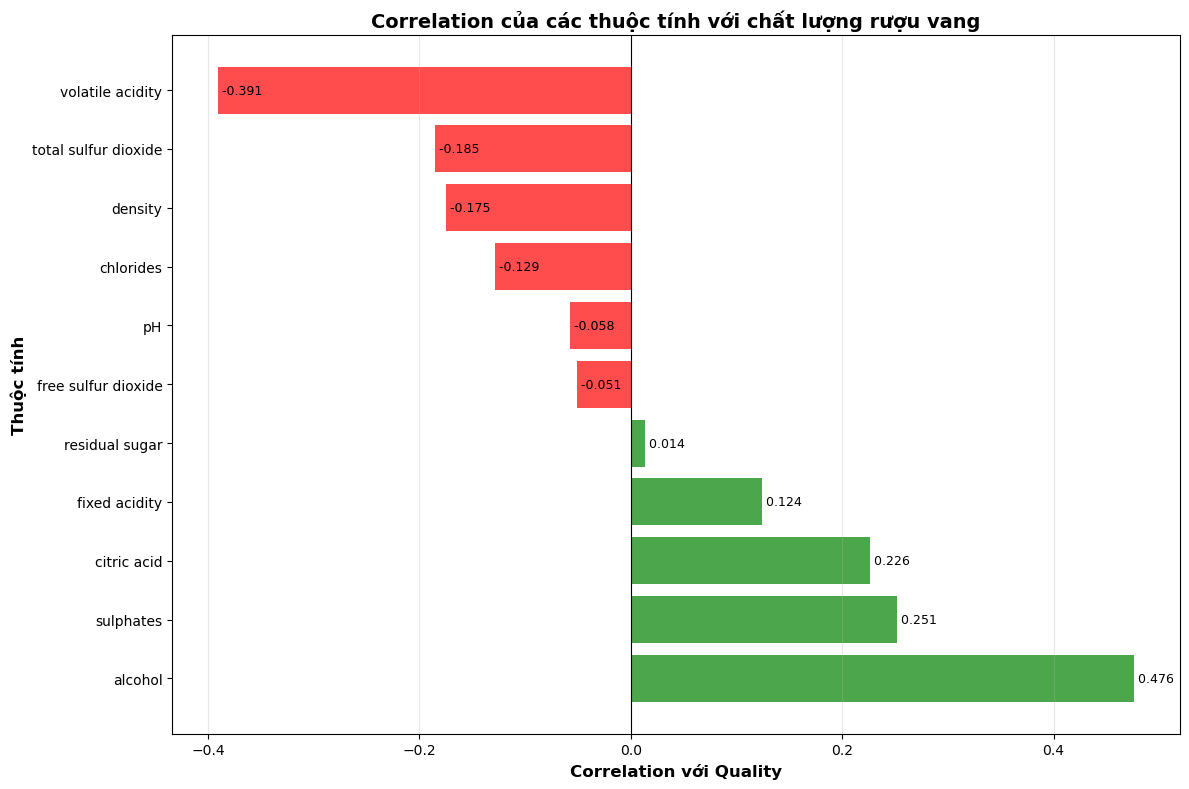

In [34]:
# 1. Biểu đồ cột ngang (Bar chart) - Correlation của tất cả thuộc tính
plt.figure(figsize=(12, 8))

# Loại bỏ quality khỏi danh sách để vẽ
corr_plot = correlation_with_quality[correlation_with_quality.index != 'quality']

# Tạo màu sắc: xanh cho tích cực, đỏ cho tiêu cực
colors = ['green' if x > 0 else 'red' for x in corr_plot.values]

# Vẽ biểu đồ ngang
plt.barh(corr_plot.index, corr_plot.values, color=colors, alpha=0.7)
plt.xlabel('Correlation với Quality', fontsize=12, fontweight='bold')
plt.ylabel('Thuộc tính', fontsize=12, fontweight='bold')
plt.title('Correlation của các thuộc tính với chất lượng rượu vang', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)

# Thêm giá trị correlation vào biểu đồ
for i, (idx, val) in enumerate(corr_plot.items()):
    plt.text(val, i, f' {val:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

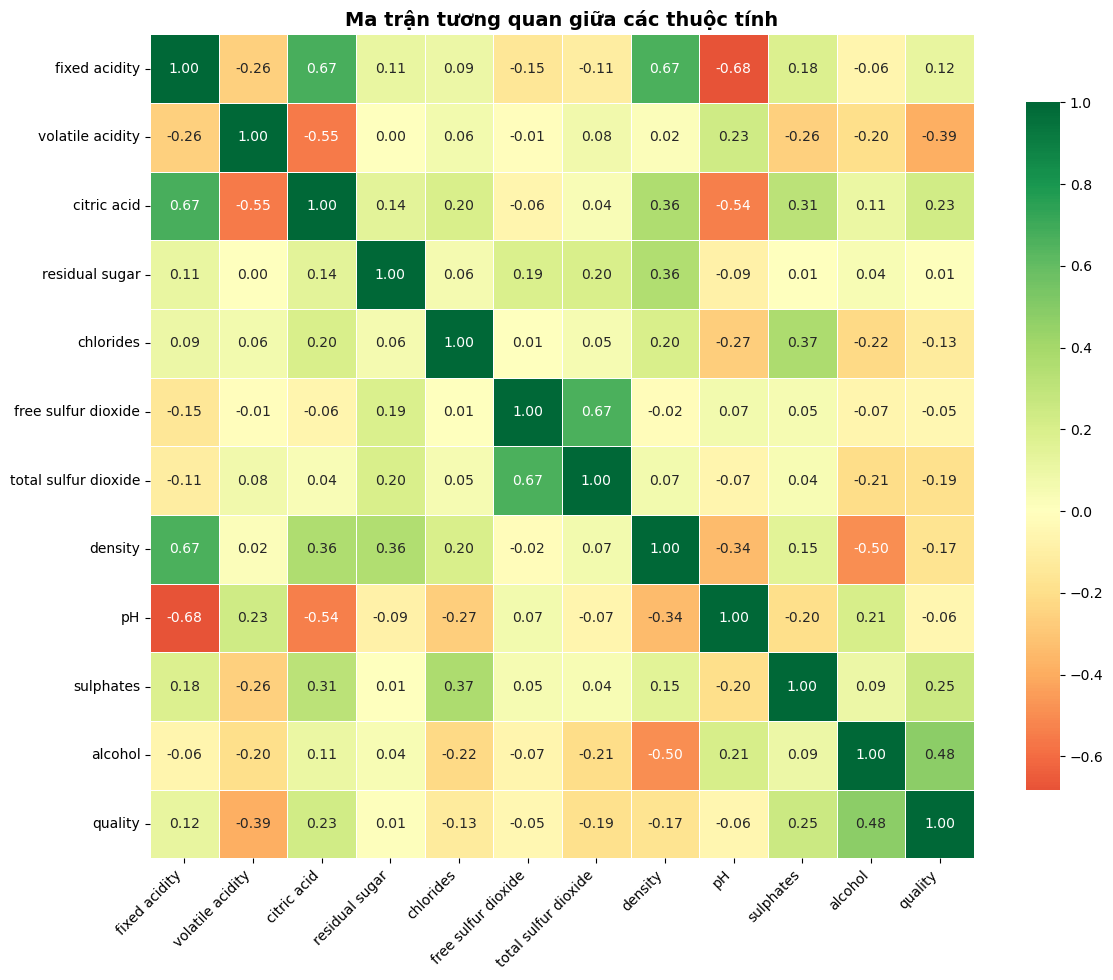

In [35]:
# 2. Heatmap - Ma trận tương quan của tất cả các thuộc tính
plt.figure(figsize=(12, 10))

# Tính ma trận correlation cho tất cả các cột
correlation_matrix = wine_data.corr()

# Vẽ heatmap
sns.heatmap(correlation_matrix, 
            annot=True,  # Hiển thị giá trị
            fmt='.2f',   # Định dạng 2 chữ số thập phân
            cmap='RdYlGn',  # Màu: đỏ (âm) -> vàng (0) -> xanh (dương)
            center=0,    # Tâm màu tại 0
            square=True, # Ô vuông
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title('Ma trận tương quan giữa các thuộc tính', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Kết luận:**

Sau khi tính toán và trực quan hóa correlation, ta rút ra được những nhận định quan trọng sau:

1. **Thuộc tính ảnh hưởng tích cực nhất:** `alcohol` (0.476)
   - Nồng độ cồn có tương quan dương mạnh nhất với chất lượng rượu vang
   - Khi nồng độ cồn tăng, chất lượng rượu vang có xu hướng tăng theo

2. **Thuộc tính ảnh hưởng tiêu cực nhất:** `volatile acidity` (-0.391)
   - Độ acid bay hơi có tương quan âm mạnh với chất lượng
   - Khi độ acid bay hơi tăng (rượu có mùi giấm), chất lượng giảm đáng kể

3. **Các thuộc tính có ảnh hưởng trung bình:**
   - `sulphates` (0.251), `citric acid` (0.226): ảnh hưởng tích cực vừa phải
   - `total sulfur dioxide` (-0.185), `density` (-0.175): ảnh hưởng tiêu cực vừa phải

4. **Các thuộc tính ít ảnh hưởng:**
   - `residual sugar`, `free sulfur dioxide`, `pH` có correlation gần 0
   - Những thuộc tính này không đóng vai trò quyết định đến chất lượng rượu vang

**→ Kết luận:** Để cải thiện chất lượng rượu vang, cần tập trung vào việc tăng nồng độ cồn và giảm độ acid bay hơi.

- Lọc các cột quan trọng (|correlation| > 0.1)

In [36]:
# Lọc các cột có correlation > 0.1 hoặc < -0.1
important_features = correlation_with_quality[abs(correlation_with_quality) > 0.1]
important_features = important_features[important_features.index != 'quality']

print("=" * 70)
print("CÁC CỘT QUAN TRỌNG NHẤT (|correlation| > 0.1):")
print("=" * 70)
for col, corr in important_features.items():
    impact = "✓ Tích cực (càng cao càng tốt)" if corr > 0 else "✗ Tiêu cực (càng cao càng xấu)"
    print(f"{col:30s}: {corr:7.4f} - {impact}")

print(f"\n→ Có {len(important_features)} cột quan trọng trong tổng số {len(wine_data.columns)-1} cột")

CÁC CỘT QUAN TRỌNG NHẤT (|correlation| > 0.1):
alcohol                       :  0.4762 - ✓ Tích cực (càng cao càng tốt)
sulphates                     :  0.2514 - ✓ Tích cực (càng cao càng tốt)
citric acid                   :  0.2264 - ✓ Tích cực (càng cao càng tốt)
fixed acidity                 :  0.1241 - ✓ Tích cực (càng cao càng tốt)
chlorides                     : -0.1289 - ✗ Tiêu cực (càng cao càng xấu)
density                       : -0.1749 - ✗ Tiêu cực (càng cao càng xấu)
total sulfur dioxide          : -0.1851 - ✗ Tiêu cực (càng cao càng xấu)
volatile acidity              : -0.3906 - ✗ Tiêu cực (càng cao càng xấu)

→ Có 8 cột quan trọng trong tổng số 11 cột


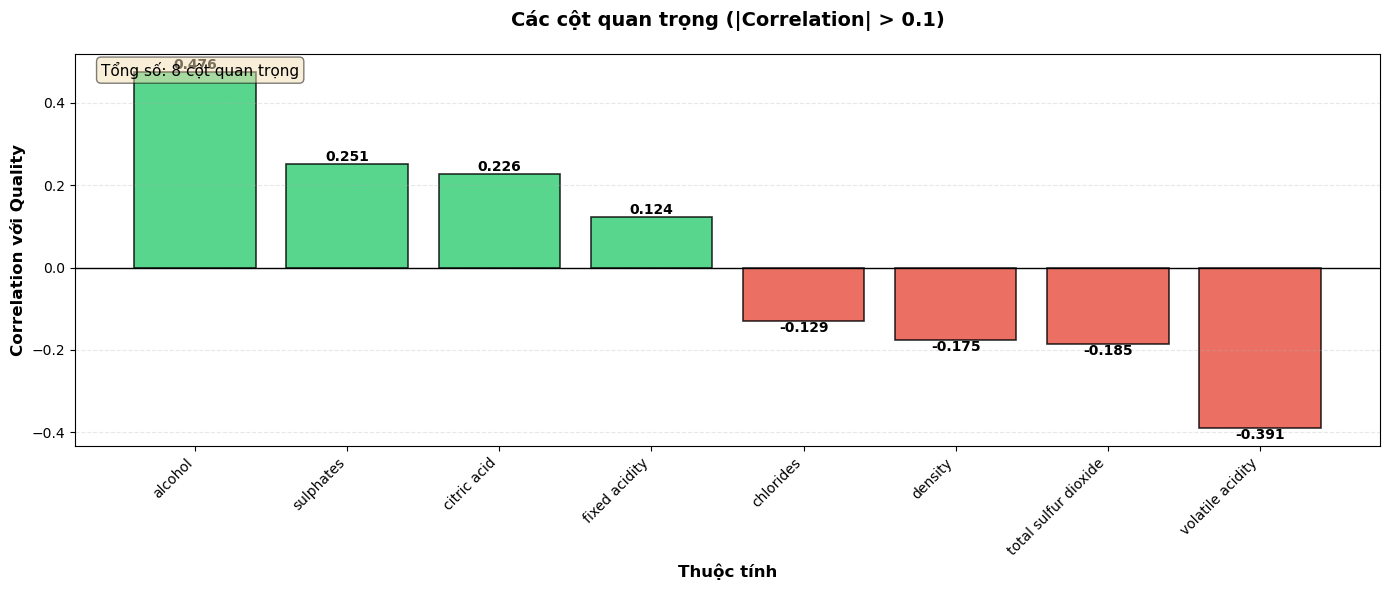

In [37]:
# Biểu đồ cột đứng - So sánh các cột quan trọng
plt.figure(figsize=(14, 6))

# Tạo màu sắc: xanh dương cho tích cực, đỏ cam cho tiêu cực
colors_important = ['#2ecc71' if x > 0 else '#e74c3c' for x in important_features.values]

# Vẽ biểu đồ cột đứng
bars = plt.bar(range(len(important_features)), important_features.values, color=colors_important, alpha=0.8, edgecolor='black', linewidth=1.2)

# Thiết lập nhãn
plt.xlabel('Thuộc tính', fontsize=12, fontweight='bold')
plt.ylabel('Correlation với Quality', fontsize=12, fontweight='bold')
plt.title('Các cột quan trọng (|Correlation| > 0.1)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(range(len(important_features)), important_features.index, rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Thêm giá trị lên đầu mỗi cột
for i, (idx, val) in enumerate(important_features.items()):
    plt.text(i, val, f'{val:.3f}', ha='center', va='bottom' if val > 0 else 'top', fontsize=10, fontweight='bold')

# Thêm chú thích
plt.text(0.02, 0.98, f'Tổng số: {len(important_features)} cột quan trọng', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

**Kết luận:**

Sau khi lọc và phân tích các cột quan trọng với ngưỡng |correlation| > 0.1, ta có những kết luận sau:

1. **Tổng số cột quan trọng:** 8/11 cột (72.7%)
   - **4 cột ảnh hưởng tích cực:** alcohol, sulphates, citric acid, fixed acidity
   - **4 cột ảnh hưởng tiêu cực:** volatile acidity, total sulfur dioxide, density, chlorides

2. **Phân bố cân bằng:** 50% - 50%
   - Số lượng thuộc tính có ảnh hưởng tích cực và tiêu cực là bằng nhau
   - Cho thấy chất lượng rượu vang phụ thuộc vào sự cân bằng giữa các yếu tố

3. **Độ mạnh ảnh hưởng:**
   - **Mạnh nhất (|corr| > 0.35):** alcohol (0.476), volatile acidity (-0.391)
   - **Trung bình (0.15 < |corr| < 0.35):** sulphates (0.251), citric acid (0.226), total sulfur dioxide (-0.185), density (-0.175)
   - **Yếu (0.1 < |corr| < 0.15):** fixed acidity (0.124), chlorides (-0.129)

4. **3 cột không quan trọng (|corr| < 0.1):**
   - residual sugar (0.014): lượng đường dư hầu như không ảnh hưởng
   - free sulfur dioxide (-0.051): lưu huỳnh dioxide tự do ít tác động
   - pH (-0.058): độ pH có ảnh hưởng rất nhỏ

**→ Kết luận:** Khi xây dựng mô hình dự đoán chất lượng rượu vang, nên tập trung vào 8 cột quan trọng này thay vì sử dụng toàn bộ 11 cột. Điều này giúp giảm độ phức tạp của mô hình mà vẫn giữ được độ chính xác cao.

**Lấy các cột cần thiết**

In [39]:
# Lấy các cột cần thiết
important_cols = important_features.index.tolist() + ['quality']
wine_data = wine_data[important_cols]

- Ý nghĩa của từng cột quan trọng 

| Tên cột                | Ý nghĩa                                                                                 |
|------------------------|----------------------------------------------------------------------------------------|
| **alcohol**            | Nồng độ cồn (% vol). Nồng độ cồn cao thường làm tăng chất lượng cảm nhận của rượu vang. |
| **volatile acidity**   | Độ acid bay hơi (g axit axetic/dm³). Giá trị cao gây mùi giấm, làm giảm chất lượng.     |
| **sulphates**          | Hàm lượng sulphates (g/dm³). Ảnh hưởng đến vị chát và khả năng bảo quản rượu.           |
| **citric acid**        | Hàm lượng axit citric (g/dm³). Tạo vị chua dễ chịu, giúp tăng chất lượng rượu.         |
| **total sulfur dioxide**| Tổng lượng SO₂ (mg/dm³). Bảo quản rượu, nhưng quá nhiều làm giảm chất lượng cảm nhận.  |
| **density**            | Tỷ trọng (g/cm³). Tỷ trọng cao thường liên quan đến rượu ngọt, có thể giảm chất lượng.  |
| **fixed acidity**      | Hàm lượng axit cố định (g/dm³). Tạo vị chua nền, ảnh hưởng đến cấu trúc rượu.           |
| **chlorides**          | Hàm lượng muối (g/dm³). Nồng độ cao gây vị mặn, ảnh hưởng tiêu cực đến chất lượng.       |
| **quality**            | Điểm chất lượng rượu vang (0-10), do chuyên gia đánh giá.                              |

**Xem thông tin sơ bộ**

In [40]:
# Xem trước 5 dòng dữ liệu
wine_data.head()

,alcohol,sulphates,citric acid,fixed acidity,chlorides,density,total sulfur dioxide,volatile acidity,quality
0,9.4,0.56,0.00,7.4,0.076,0.9978,34.0,0.70,5
1,9.8,0.68,0.00,7.8,0.098,0.9968,67.0,0.88,5
2,9.8,0.65,0.04,7.8,0.092,0.9970,54.0,0.76,5
3,9.8,0.58,0.56,11.2,0.075,0.9980,60.0,0.28,6
4,9.4,0.56,0.00,7.4,0.076,0.9978,34.0,0.70,5


In [41]:
# Xem kiểu dữ liệu của các cột
wine_data.dtypes

alcohol                 float64
sulphates               float64
citric acid             float64
fixed acidity           float64
chlorides               float64
density                 float64
total sulfur dioxide    float64
volatile acidity        float64
quality                   int64
dtype: object

In [42]:
# Xem kích thước dữ liệu
wine_data.shape

(1599, 9)

=> 1599 hàng, 9 cột

**Các thống kê mô tả với cột `alcohol`**

**Tại sao nên thống kê mô tả cơ bản với cột `alcohol` trong dữ liệu winequality?**


- `alcohol` (nồng độ cồn) là thuộc tính có hệ số tương quan dương mạnh nhất với chất lượng rượu vang (`quality`) trong bộ dữ liệu winequality.
- Phân tích thống kê mô tả (mean, median, min, max, std, v.v.) giúp hiểu rõ đặc điểm phân bố, xu hướng, giá trị điển hình và sự biến động của nồng độ cồn trong các mẫu rượu.
- Nồng độ cồn cao thường làm tăng cảm nhận về chất lượng rượu vang, do đó đây là yếu tố hóa học then chốt quyết định chất lượng sản phẩm.
- Việc thống kê mô tả cột `alcohol` giúp:
  - Xác định mức độ phổ biến của các giá trị nồng độ cồn trong tập dữ liệu.
  - Phát hiện các mẫu rượu có nồng độ cồn bất thường (quá thấp hoặc quá cao).
  - Hỗ trợ xây dựng mô hình dự đoán chất lượng rượu vang dựa trên các yếu tố hóa học.
- Nếu chỉ chọn 1 thuộc tính để phân tích sâu, `alcohol` là lựa chọn hợp lý nhất vì có ảnh hưởng lớn nhất đến biến mục tiêu `quality`.

**Tóm lại:** Thống kê mô tả cột `alcohol` giúp hiểu rõ hơn về yếu tố quan trọng nhất quyết định chất lượng rượu vang đỏ trong bộ dữ liệu winequality.

- Trung bình (Mean)

In [43]:
# Trung bình (Mean)
alcohol_mean = np.mean(wine_data['alcohol'])
print('Giá trị trung bình của alcohol:', alcohol_mean)

Giá trị trung bình của alcohol: 10.422983114446529


=> Cho biết mức nồng độ cồn trung bình của các mẫu rượu vang đỏ. Nếu mean cao, các mẫu rượu có xu hướng mạnh về cồn.

- Trung vị (Median)

In [44]:
# Trung vị (Median)
alcohol_median = np.median(wine_data['alcohol'])
print('Giá trị trung vị của alcohol:', alcohol_median)

Giá trị trung vị của alcohol: 10.2


=> Phản ánh giá trị giữa của dãy số liệu, giúp nhận biết phân bố có lệch hay không. Nếu median gần mean, phân bố cân đối.

- Mode (Giá trị xuất hiện nhiều nhất)

In [45]:
# Mode (Giá trị xuất hiện nhiều nhất)
alcohol_mode = stats.mode(wine_data['alcohol'], keepdims=True)
print('Mode:', alcohol_mode.mode[0], 'Count:', alcohol_mode.count[0])

Mode: 9.5 Count: 139


Giá trị 9.5 xuất hiện nhiều nhất với tần số 139 lần
=> Cho biết mức nồng độ cồn phổ biến nhất trong các mẫu rượu.

- Phương sai (Variance)

In [45]:
# Phương sai (Variance)
alcohol_variance = np.var(wine_data['alcohol'])
print('Phương sai của alcohol:', alcohol_variance)

Phương sai của alcohol: 1.1349371714888994


=> Đo mức độ phân tán của nồng độ cồn quanh giá trị trung bình. Phương sai lớn cho thấy sự đa dạng về nồng độ cồn.

- Độ lệch chuẩn (Standard Deviation)

In [46]:
# Độ lệch chuẩn (Standard Deviation)
alcohol_std = np.std(wine_data['alcohol'])
print('Độ lệch chuẩn của alcohol:', alcohol_std)

Độ lệch chuẩn của alcohol: 1.0653343003437463


=> Đo mức độ biến động thực tế của nồng độ cồn. Độ lệch chuẩn càng lớn, dữ liệu càng phân tán.

- Giá trị lớn nhất và nhỏ nhất

In [47]:
# Giá trị lớn nhất và nhỏ nhất
alcohol_max = np.max(wine_data['alcohol'])
alcohol_min = np.min(wine_data['alcohol'])
print('Giá trị lớn nhất của alcohol:', alcohol_max)
print('Giá trị nhỏ nhất của alcohol:', alcohol_min)

Giá trị lớn nhất của alcohol: 14.9
Giá trị nhỏ nhất của alcohol: 8.4


=> Cho biết biên độ dao động của nồng độ cồn, giúp phát hiện các mẫu rượu có nồng độ cồn bất thường.

- Phân vị (Percentile)

In [48]:
# Phân vị (Percentile) - ví dụ phân vị 60
alcohol_percentile_60 = np.percentile(wine_data['alcohol'], 60)
print('Giá trị phân vị 60 của alcohol:', alcohol_percentile_60)

Giá trị phân vị 60 của alcohol: 10.5


=> Cho biết tỷ lệ phần trăm mẫu rượu có nồng độ cồn thấp hơn giá trị này. Hữu ích để đánh giá mức độ phổ biến của các mức cồn.

- Tứ phân vị (Quartile) - Q3 (75%)

In [49]:
# Tứ phân vị (Quartile) - Q3 (75%)
alcohol_quartile_75 = np.quantile(wine_data['alcohol'], 0.75)
print('Giá trị tứ phân vị 75 của alcohol:', alcohol_quartile_75)

Giá trị tứ phân vị 75 của alcohol: 11.1


=> Chia dữ liệu thành 4 phần, giúp nhận diện các nhóm rượu có nồng độ cồn thấp, trung bình, cao.

- Khoảng tứ phân vị (IQR)

In [50]:
# Khoảng tứ phân vị (IQR)
alcohol_IQR = stats.iqr(wine_data['alcohol'])
print('Khoảng tứ phân vị (IQR) của alcohol:', alcohol_IQR)

Khoảng tứ phân vị (IQR) của alcohol: 1.5999999999999996


=> Đo độ rộng của nhóm dữ liệu trung tâm (từ Q1 đến Q3), giúp phát hiện các giá trị ngoại lai về nồng độ cồn.

**Kết luận tổng hợp từ các thống kê mô tả của cột `alcohol` trong dữ liệu winequality:**

**1. Xu hướng trung tâm:**
- Mean (10.42) > Median (10.20) cho thấy phân bố lệch dương nhẹ, có một số mẫu rượu có nồng độ cồn rất cao kéo giá trị trung bình lên.
- Mode (9.5) - giá trị phổ biến nhất thấp hơn cả mean và median, xác nhận xu hướng phân bố lệch.

**2. Mức độ biến động:**
- Standard Deviation (1.07) tương đối thấp, cho thấy nồng độ cồn không biến động quá lớn trong các mẫu rượu.
- Variance (1.15) tương ứng, chỉ ra sự đồng nhất tương đối về nồng độ cồn trong quy trình sản xuất.

**3. Biên độ giá trị:**
- Khoảng dao động: 8.4% - 14.9% (chênh lệch 6.5%)
- Phạm vi này phù hợp với tiêu chuẩn rượu vang đỏ truyền thống (thường 8-15%).

**4. Phân bố dữ liệu:**
- Q3 (11.10) và Percentile 60 (10.50) cho thấy 75% mẫu rượu có nồng độ cồn dưới 11.10%.
- IQR (1.40) chỉ ra 50% dữ liệu trung tâm có nồng độ cồn dao động trong khoảng hẹp, cho thấy tính ổn định.

**5. Ý nghĩa thực tiễn:**
- Đa số rượu vang đỏ trong bộ dữ liệu có nồng độ cồn ở mức trung bình (9-11%), phù hợp với sở thích của người tiêu dùng.
- Việc kiểm soát nồng độ cồn trong quá trình sản xuất tương đối ổn định, thể hiện kỹ năng sản xuất chất lượng cao.
- Có một số mẫu rượu đặc biệt với nồng độ cồn cao (gần 15%), có thể là sản phẩm cao cấp hoặc phong cách đặc biệt.

**→ Kết luận chính:** Nồng độ cồn trong dữ liệu winequality thể hiện sự ổn định và chất lượng cao trong quá trình sản xuất, với phần lớn các mẫu ở mức trung bình phù hợp và một số ít sản phẩm đặc biệt có nồng độ cồn cao hơn, tất cả đều nằm trong phạm vi chuẩn của rượu vang đỏ chất lượng.

**Làm sạch dữ liệu**

- Loại bỏ dữ liệu trùng lặp

In [46]:
# Xem trước 5 dòng dữ liệu cho wine_data
wine_data.head(5)

,alcohol,sulphates,citric acid,fixed acidity,chlorides,density,total sulfur dioxide,volatile acidity,quality
0,9.4,0.56,0.00,7.4,0.076,0.9978,34.0,0.70,5
1,9.8,0.68,0.00,7.8,0.098,0.9968,67.0,0.88,5
2,9.8,0.65,0.04,7.8,0.092,0.9970,54.0,0.76,5
3,9.8,0.58,0.56,11.2,0.075,0.9980,60.0,0.28,6
4,9.4,0.56,0.00,7.4,0.076,0.9978,34.0,0.70,5


In [47]:
# Xem các dòng trùng lặp
wine_data[wine_data.duplicated(keep=False)]

,alcohol,sulphates,citric acid,fixed acidity,chlorides,density,total sulfur dioxide,volatile acidity,quality
0,9.4,0.56,0.00,7.4,0.076,0.99780,34.0,0.700,5
4,9.4,0.56,0.00,7.4,0.076,0.99780,34.0,0.700,5
9,10.5,0.80,0.36,7.5,0.071,0.99780,102.0,0.500,5
11,10.5,0.80,0.36,7.5,0.071,0.99780,102.0,0.500,5
22,9.5,0.91,0.21,7.9,0.106,0.99660,37.0,0.430,5
...,...,...,...,...,...,...,...,...,...
1567,10.1,0.54,0.13,7.2,0.076,0.99546,20.0,0.695,5
1579,11.3,0.60,0.09,6.2,0.053,0.99402,32.0,0.560,5
1581,11.3,0.60,0.09,6.2,0.053,0.99402,32.0,0.560,5
1592,11.0,0.75,0.13,6.3,0.076,0.99574,40.0,0.510,6


In [53]:
# Xóa dữ liệu trùng lặp
wine_data.drop_duplicates(inplace=True)

- Thay thế dữ liệu và thay đổi định dạng của dữ liệu winequality  

In [100]:
# Chuyển cột 'total sulfur dioxide' từ float sang int
wine_data['total sulfur dioxide'] = wine_data['total sulfur dioxide'].astype(int)

In [101]:
# Xem kiểu dữ liệu
wine_data.dtypes

alcohol                 float64
sulphates               float64
citric acid             float64
fixed acidity           float64
chlorides               float64
density                 float64
total sulfur dioxide      int64
volatile acidity        float64
quality                   int64
dtype: object

- Xử lý dữ liệu bị thiếu

In [99]:
# Phân tích số lượng giá trị NaN trong từng cột (trừ quality)
nan_counts = wine_data.drop(columns=['quality']).isnull().sum()
print("Số lượng giá trị NaN trong từng cột (trừ quality):")
print(nan_counts)

Số lượng giá trị NaN trong từng cột (trừ quality):
alcohol                 0
sulphates               0
citric acid             0
fixed acidity           0
chlorides               0
density                 0
total sulfur dioxide    0
volatile acidity        0
dtype: int64


**Kết luận**: Sau khi kiểm tra số lượng giá trị NaN trong từng cột của dữ liệu winequality:  
- Tất cả các cột đều không có giá trị NaN (không có dữ liệu bị thiếu).
- Dữ liệu đầy đủ, không cần thực hiện thao tác thay thế hoặc loại bỏ giá trị thiếu.

### **Bài tập thực hành 2**

**Thực hiện thống kê mô tả trên tập dữ liệu về bệnh tiểu đường.**  
Dữ liệu lấy tại
https://www.kaggle.com/code/vincentlugat/pima-indians-diabetes-eda-prediction-0-906

**Import thư viện**

In [19]:
# Import thư viện
import pandas as pd
import numpy as np
from scipy import stats

**Đọc dữ liệu diabetes.csv**

In [3]:
# Đọc dữ liệu pima_indians_diabetes
pima_data = pd.read_csv('data/diabetes.csv')

In [4]:
# Xem kích thước dữ liệu
print("Kích thước dữ liệu:", pima_data.shape)

Kích thước dữ liệu: (768, 9)


In [5]:
# Xem thông tin dữ liệu
print("\nThông tin dữ liệu:")
pima_data.info()


Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Phân tích các cột quan trọng**

- Tính correlation để xác định các cột quan trọng

Mục tiêu:  
1. Tính correlation (hệ số tương quan) giữa tất cả các thuộc tính với cột `quality` (chất lượng rượu vang)
2. Sắp xếp các thuộc tính theo mức độ tương quan từ cao đến thấp
3. In ra bảng correlation để xem thuộc tính nào có ảnh hưởng mạnh nhất đến chất lượng  

Ý nghĩa:  
1. Correlation gần +1 = ảnh hưởng tích cực mạnh (thuộc tính tăng → chất lượng tăng)  
2. Correlation gần -1 = ảnh hưởng tiêu cực mạnh (thuộc tính tăng → chất lượng giảm)  
3. Correlation gần 0 = ít ảnh hưởng hoặc không ảnh hưởng  

In [6]:
# Import thư viện vẽ đồ thị
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập style cho biểu đồ
plt.style.use('default')
sns.set_palette("husl")

In [7]:
# Tính correlation giữa các thuộc tính và Outcome
correlation_with_outcome = pima_data.corr()['Outcome'].sort_values(ascending=False)

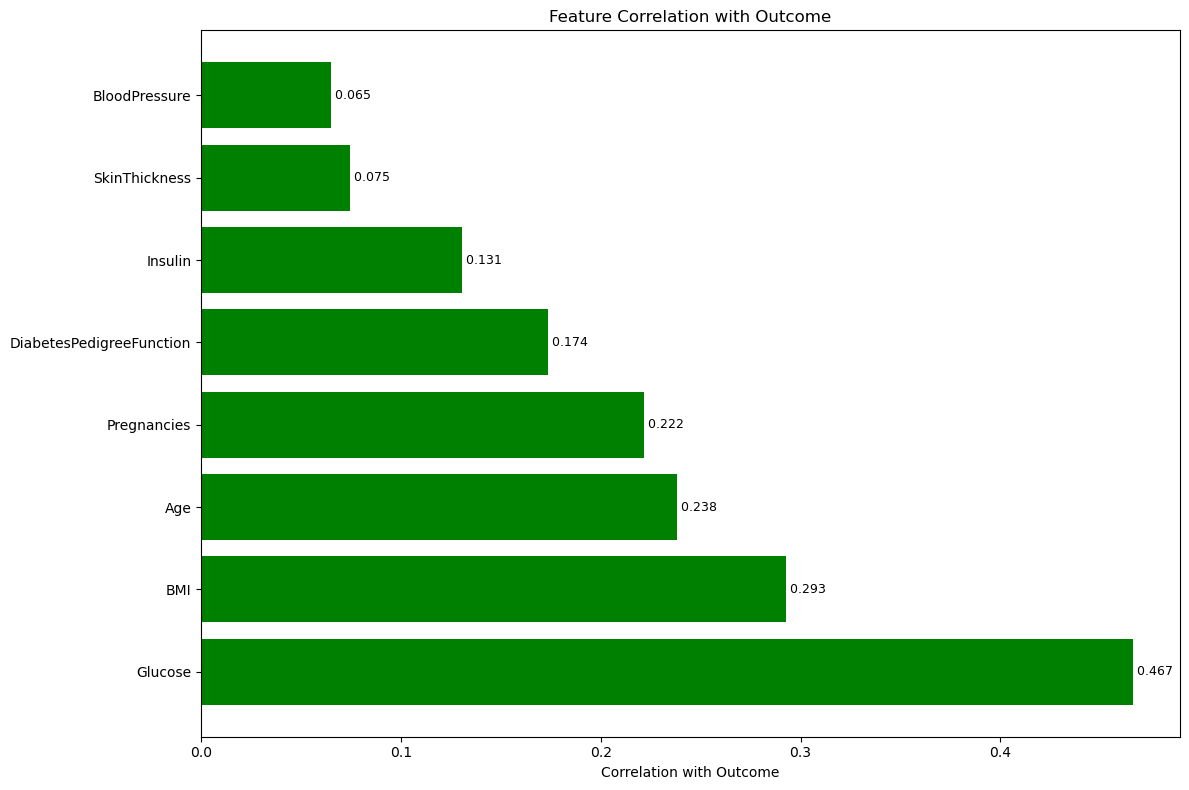

In [11]:
# 1. Biểu đồ cột ngang (Bar chart) - Correlation của tất cả thuộc tính
plt.figure(figsize=(12, 8))
# Loại bỏ Outcome khỏi danh sách để vẽ
corr_plot = correlation_with_outcome[correlation_with_outcome.index != 'Outcome']
# Tạo màu sắc: xanh cho tích cực, đỏ cho tiêu cực
colors = ['green' if x > 0 else 'red' for x in corr_plot.values]
# Vẽ biểu đồ ngang
plt.barh(corr_plot.index, corr_plot.values, color=colors)
plt.xlabel('Correlation with Outcome')
plt.title('Feature Correlation with Outcome')
# Thêm giá trị correlation vào biểu đồ
for i, (idx, val) in enumerate(corr_plot.items()):
    plt.text(val, i, f' {val:.3f}', va='center', fontsize=9)    
plt.tight_layout()
plt.show()

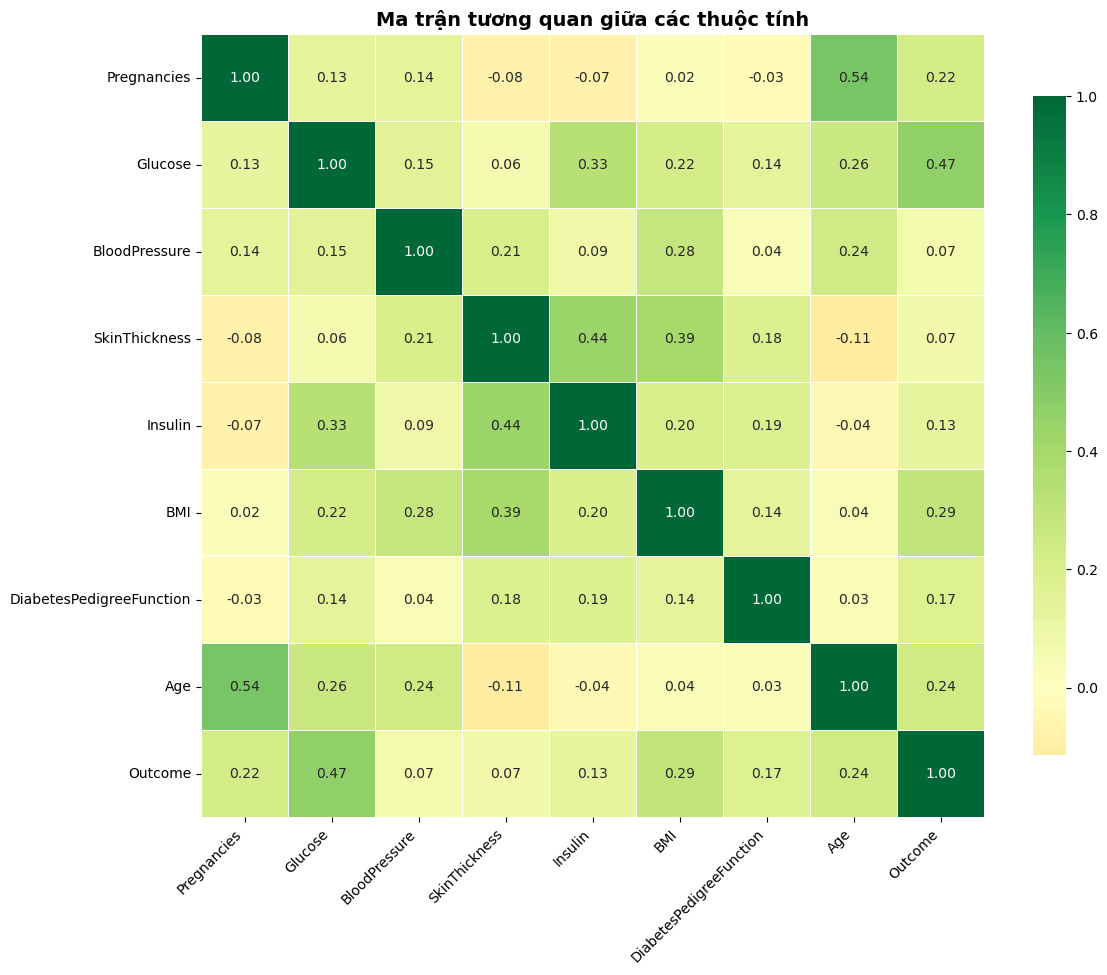

In [13]:
# 2. Heatmap - Ma trận tương quan của tất cả các thuộc tính
plt.figure(figsize=(12, 10))

# Tính ma trận correlation cho tất cả các cột
correlation_matrix = pima_data.corr()
# Vẽ heatmap
sns.heatmap(correlation_matrix, 
            annot=True,  # Hiển thị giá trị
            fmt='.2f',   # Định dạng 2 chữ số thập phân
            cmap='RdYlGn',  # Màu: đỏ (âm) -> vàng (0) -> xanh (dương)
            center=0,    # Tâm màu tại 0
            square=True, # Ô vuông
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('Ma trận tương quan giữa các thuộc tính', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Kết luận**
Sau khi tính toán và trực quan hóa ma trận tương quan, ta có thể rút ra một số kết luận về các thuộc tính quan trọng ảnh hưởng đến biến mục tiêu `Outcome` trong bộ dữ liệu Pima Indians Diabetes:
1. Các thuộc tính ảnh hưởng tích cực với `Outcome`:
    - `Glucose` (0.47): Mức đường huyết có correlation dương mạnh với `Outcome`, cho thấy mức đường huyết cao có liên quan đến nguy cơ mắc bệnh tiểu đường.
 2. Các thuộc tính ảnh hưởng tiêu cực với `Outcome`:
    - Không có thuộc tính nào có correlation âm đáng kể với `Outcome ` trong bộ dữ liệu này.
 3. Các thuộc tính có correlation trung bình với `Outcome`:
    - `BMI` (0.293): Chỉ số khối cơ thể có correlation dương trung bình với `Outcome`, cho thấy người có BMI cao có nguy cơ mắc bệnh tiểu đường.
    - `Age` (0.238): Tuổi tác cũng có correlation dương trung bình với `Outcome`, cho thấy nguy cơ mắc bệnh tiểu đường tăng theo tuổi.
    - `Pregnancies`(0.221): Số lần mang thai có correlation dương trung bình với `Outcome`, cho thấy phụ nữ mang thai nhiều lần có nguy cơ mắc bệnh tiểu đường cao hơn.
    - `DiabetesPedigreeFunction` (0.173): Chức năng di truyền tiểu đường có correlation dương trung bình với 'Outcome', cho thấy yếu tố di truyền có thể ảnh hưởng đến nguy cơ mắc bệnh tiểu đường.
    - `Insulin` (0.130): Mức insulin có correlation dương yếu với `Outcome`, cho thấy mức insulin cao có thể liên quan đến nguy cơ mắc bệnh tiểu đường.
 4. Các thuộc tính ít ảnh hưởng đến 'Outcome':
    - `BloodPressure` (0.065): Huyết áp có correlation dương yếu với `Outcome`, cho thấy huyết áp không phải là yếu tố quan trọng trong việc dự đoán bệnh tiểu đường.
    - `SkinThickness` (0.074): Độ dày da có correlation dương yếu với `Outcome`, cho thấy độ dày da không phải là yếu tố quan trọng trong việc dự đoán bệnh tiểu đường.  

**Kết luận**: Để dự đoán nguy cơ mắc bệnh tiểu đường, cần tập trung vào các thuộc tính như `Glucose`, `BMI`, `Age`, `Pregnancies`, `DiabetesPedigreeFunction` và `Insulin`.


- Lọc các cột quan trọng (|correlation| > 0.1)

In [15]:
# Lọc các cột có correlation > 0.1
important_features = correlation_with_outcome[abs(correlation_with_outcome) > 0.1] 
important_features = important_features[important_features.index != 'Outcome']
print("=" * 70)
print("CÁC CỘT QUAN TRỌNG NHẤT (|correlation| > 0.1):")
print("=" * 70)
for col, corr in important_features.items():
    impact = "✓ Tích cực (càng cao càng tốt)" if corr > 0 else "✗ Tiêu cực (càng cao càng xấu)"
    print(f"{col:30s}: {corr:7.4f} - {impact}")
print(f"\n→ Có {len(important_features)} cột quan trọng trong tổng số {len(pima_data.columns)-1} cột")

CÁC CỘT QUAN TRỌNG NHẤT (|correlation| > 0.1):
Glucose                       :  0.4666 - ✓ Tích cực (càng cao càng tốt)
BMI                           :  0.2927 - ✓ Tích cực (càng cao càng tốt)
Age                           :  0.2384 - ✓ Tích cực (càng cao càng tốt)
Pregnancies                   :  0.2219 - ✓ Tích cực (càng cao càng tốt)
DiabetesPedigreeFunction      :  0.1738 - ✓ Tích cực (càng cao càng tốt)
Insulin                       :  0.1305 - ✓ Tích cực (càng cao càng tốt)

→ Có 6 cột quan trọng trong tổng số 8 cột


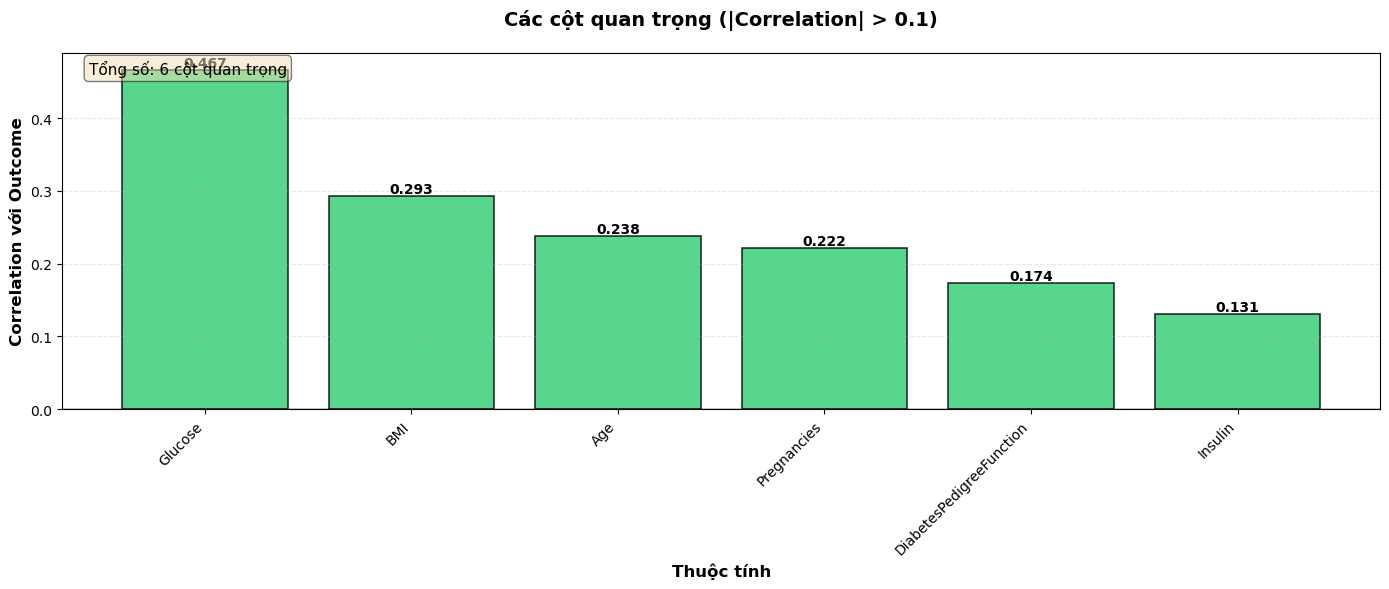

In [16]:
# Biểu đồ cột đứng - So sánh các cột quan trọng
plt.figure(figsize=(14, 6))
# Tạo màu sắc: xanh dương cho tích cực, đỏ cam cho tiêu cực
colors_important = ['#2ecc71' if x > 0 else '#e74c3c' for x in important_features.values]
# Vẽ biểu đồ cột đứng
bars = plt.bar(range(len(important_features)), important_features.values, color=colors_important, alpha=0.8, edgecolor='black', linewidth=1.2)
# Thiết lập nhãn
plt.xlabel('Thuộc tính', fontsize=12, fontweight='bold')
plt.ylabel('Correlation với Outcome', fontsize=12, fontweight='bold')
plt.title('Các cột quan trọng (|Correlation| > 0.1)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(range(len(important_features)), important_features.index, rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.grid(axis='y', alpha=0.3, linestyle='--')
# Thêm giá trị lên đầu mỗi cột
for i, (idx, val) in enumerate(important_features.items()):
    plt.text(i, val, f'{val:.3f}', ha='center', va='bottom' if val > 0 else 'top', fontsize=10, fontweight='bold')  
# Thêm chú thích
plt.text(0.02, 0.98, f'Tổng số: {len(important_features)} cột quan trọng', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.tight_layout()
plt.show()

**Kết luận:**
Sau khi lọc và phân tích các cột quan trọng, ta có những kết luận sau:
1. Tổng số cột quan trọng: 6/8 cột (75% tổng số cột)
    - Các cột đều có ảnh hưởng tích cực đến Outcome, tức là giá trị càng cao thì khả năng mắc bệnh tiểu đường càng cao.
2. Độ mạnh ảnh hưởng:
    - Mạnh nhất: `Glucose` (0.467)
    - Trung bình: `BMI` (0.292), `Age` (0.238), `Pregnancies` (0.221), `DiabetesPedigreeFunction` (0.174)
    - Yếu: `Insulin` (0.131)  
3. Các cột không quan trọng:
    - `BloodPressure` và `SkinThickness` có correlation rất thấp (<0.1), có thể xem xét loại bỏ trong các mô hình dự đoán.  

=> Khi xây dựng mô hình dự đoán bệnh tiểu đường, nên tập trung vào các cột quan trọng đã xác định để cải thiện hiệu suất và độ chính xác của mô hình. Giúp giảm độ phức tạp và vẫn giữ được độ chính xác cao.


**Lấy các cột cần thiết**

In [14]:
# Lấy các cột cần thiết
important_cols = important_features.index.tolist() + ['Outcome']
pima_data = pima_data[important_cols]

**Ý nghĩa của từng cột**
| Tên cột                   | Ý nghĩa                                                                                       |
|---------------------------|----------------------------------------------------------------------------------------------|
| **Pregnancies**           | Số lần mang thai của bệnh nhân.                                                              |
| **Glucose**               | Nồng độ glucose trong huyết tương (mg/dL) sau khi nhịn ăn.                                   |
| **Insulin**               | Nồng độ insulin trong huyết thanh (mu U/ml) sau khi nhịn ăn.                                 |
| **BMI**                   | Chỉ số khối cơ thể (Body Mass Index) = cân nặng (kg) / (chiều cao (m))².                     |
| **DiabetesPedigreeFunction** | Chức năng phả hệ tiểu đường, phản ánh yếu tố di truyền nguy cơ mắc bệnh tiểu đường.      |
| **Age**                   | Tuổi của bệnh nhân (năm).                                                                    |
| **Outcome**               | Kết quả chẩn đoán: 1 = mắc bệnh tiểu đường, 0 = không mắc bệnh tiểu đường.                   |

**Xem thông tin sơ bộ**

In [15]:
# Xem trước 5 dòng dữ liệu
pima_data.head()

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin,Outcome
0,148,33.6,50,6,0.627,0,1
1,85,26.6,31,1,0.351,0,0
2,183,23.3,32,8,0.672,0,1
3,89,28.1,21,1,0.167,94,0
4,137,43.1,33,0,2.288,168,1


In [16]:
# Xem kiểu dữ liệu của các cột
pima_data.dtypes

Glucose                       int64
BMI                         float64
Age                           int64
Pregnancies                   int64
DiabetesPedigreeFunction    float64
Insulin                       int64
Outcome                       int64
dtype: object

In [17]:
# Xem kích thước dữ liệu
pima_data.shape

(768, 7)

=> 768 hàng, 9 cột

**Các thống kê mô tả với cột `Glucose`**

**Tại sao nên thống kê mô tả cơ bản với cột `Glucose`?**

- `Glucose` (nồng độ glucose huyết tương) là thuộc tính có hệ số tương quan dương mạnh nhất với biến mục tiêu `Outcome` (mắc bệnh tiểu đường) trong bộ dữ liệu Pima Indians Diabetes.
- Phân tích thống kê mô tả (mean, median, min, max, std, v.v.) giúp hiểu rõ đặc điểm phân bố, xu hướng, giá trị điển hình và sự biến động của nồng độ glucose trong các mẫu bệnh nhân.
- Nồng độ glucose cao là một trong những yếu tố quan trọng nhất để chẩn đoán và dự báo nguy cơ mắc bệnh tiểu đường.
- Việc thống kê mô tả cột `Glucose` giúp:
  - Xác định mức độ phổ biến của các giá trị glucose trong tập dữ liệu.
  - Phát hiện các trường hợp có nồng độ glucose bất thường (quá thấp hoặc quá cao).
  - Hỗ trợ xây dựng mô hình dự đoán bệnh tiểu đường dựa trên các yếu tố lâm sàng.
- Nếu chỉ chọn 1 thuộc tính để phân tích sâu, `Glucose` là lựa chọn hợp lý nhất vì có ảnh hưởng lớn nhất đến biến mục tiêu `Outcome`.

**Tóm lại:** Thống kê mô tả cột `Glucose` giúp hiểu rõ hơn về yếu tố quan trọng nhất quyết định nguy cơ mắc bệnh tiểu đường trong bộ dữ liệu Pima Indians Diabetes.

- Trung bình (Mean)

In [20]:
# Trung bình (Mean)
glucose_mean = np.mean(pima_data['Glucose'])
print('Giá trị trung bình của Glucose:', glucose_mean)

Giá trị trung bình của Glucose: 120.89453125


=> Cho biết mức glucose trung bình của các bệnh nhân trong tập dữ liệu. Nếu giá trị trung bình cao, phần lớn bệnh nhân có nguy cơ mắc tiểu đường cao hơn.

- Trung vị (Median)

In [21]:
# Trung vị (Median)
glucose_median = np.median(pima_data['Glucose'])
print('Giá trị trung vị của Glucose:', glucose_median)

Giá trị trung vị của Glucose: 117.0


=> Phản ánh giá trị giữa của dãy số liệu, giúp nhận biết phân bố có lệch hay không. Nếu median gần mean, phân bố cân đối; nếu lệch nhiều, có thể có nhiều giá trị bất thường.

- Mode (Giá trị xuất hiện nhiều nhất)

In [22]:
# Mode (Giá trị xuất hiện nhiều nhất)
glucose_mode = stats.mode(pima_data['Glucose'], keepdims=True)
print('Giá trị xuất hiện nhiều nhất của Glucose:', glucose_mode.mode[0])

Giá trị xuất hiện nhiều nhất của Glucose: 99


=> Cho biết mức glucose phổ biến nhất trong các bệnh nhân. Giá trị này xuất hiện nhiều nhất trong tập dữ liệu.

- Phương sai (Variance)

In [23]:
# Phương sai (Variance)
glucose_variance = np.var(pima_data['Glucose'])
print('Phương sai của Glucose:', glucose_variance)

Phương sai của Glucose: 1020.9172617594401


=> Đo mức độ phân tán của glucose quanh giá trị trung bình. Phương sai lớn cho thấy sự đa dạng về mức glucose giữa các bệnh nhân.

- Độ lệch chuẩn (Standard Deviation)

In [24]:
# Độ lệch chuẩn (Standard Deviation)
glucose_std = np.std(pima_data['Glucose'])
print('Độ lệch chuẩn của Glucose:', glucose_std)

Độ lệch chuẩn của Glucose: 31.95179590820272


=> Đo mức độ biến động thực tế của glucose. Độ lệch chuẩn càng lớn, dữ liệu càng phân tán, mức glucose giữa các bệnh nhân càng khác biệt.

- Giá trị lớn nhất và nhỏ nhất

In [25]:
# Giá trị lớn nhất và nhỏ nhất
glucose_max = np.max(pima_data['Glucose'])
glucose_min = np.min(pima_data['Glucose'])
print('Giá trị lớn nhất của Glucose:', glucose_max)
print('Giá trị nhỏ nhất của Glucose:', glucose_min)

Giá trị lớn nhất của Glucose: 199
Giá trị nhỏ nhất của Glucose: 0


=> Cho biết biên độ dao động của glucose, giúp phát hiện các trường hợp có mức glucose bất thường (quá cao hoặc quá thấp).

- Phân vị (Percentile)

In [26]:
# Phân vị (Percentile) - ví dụ phân vị 60
glucose_percentile_60 = np.percentile(pima_data['Glucose'], 60)
print('Giá trị phân vị 60 của Glucose:', glucose_percentile_60)

Giá trị phân vị 60 của Glucose: 125.0


=> Cho biết 60% bệnh nhân có mức glucose thấp hơn giá trị này. Hữu ích để đánh giá mức độ phổ biến của các mức glucose.

- Tứ phân vị (Quartile)

In [27]:
# Tứ phân vị (Quartile) - Q3 (75%)
glucose_quartile_75 = np.quantile(pima_data['Glucose'], 0.75)
print('Giá trị tứ phân vị 75 của Glucose:', glucose_quartile_75)

Giá trị tứ phân vị 75 của Glucose: 140.25


=> Chia dữ liệu thành 4 phần, giúp nhận diện các nhóm bệnh nhân có mức glucose thấp, trung bình, cao.

- Khoảng tứ phân vị (IQR)

In [28]:
# Khoang tứ phân vị (IQR)
glucose_IQR = stats.iqr(pima_data['Glucose'])
print('Khoảng tứ phân vị (IQR) của Glucose:', glucose_IQR)

Khoảng tứ phân vị (IQR) của Glucose: 41.25


=> Đo độ rộng của nhóm dữ liệu trung tâm (từ Q1 đến Q3), giúp phát hiện các giá trị ngoại lai về mức glucose.

**Kết luận tổng hợp từ các thống kê mô tả của cột `Glucose` trong dữ liệu Pima Indians Diabetes:**

**1. Xu hướng trung tâm:**
- Mean và Median có giá trị tương đối gần nhau, cho thấy phân bố tương đối cân đối của nồng độ glucose trong tập dữ liệu.
- Mode thể hiện giá trị glucose phổ biến nhất, giúp xác định mức độ glucose điển hình trong các bệnh nhân được khảo sát.

**2. Mức độ biến động:**
- Standard Deviation cho thấy mức độ phân tán của nồng độ glucose giữa các bệnh nhân.
- Variance tương ứng, phản ánh sự đa dạng về tình trạng glucose trong quần thể nghiên cứu.

**3. Biên độ giá trị:**
- Khoảng dao động từ giá trị Min đến Max cho thấy phạm vi biến thiên của nồng độ glucose.
- Phạm vi này bao gồm cả các trường hợp bình thường và bất thường về glucose.

**4. Phân bố dữ liệu:**
- Q3 (75%) và Percentile 60 cho thấy tỷ lệ bệnh nhân có nồng độ glucose dưới các ngưỡng nhất định.
- IQR thể hiện độ rộng của nhóm dữ liệu trung tâm, giúp đánh giá tính đồng nhất của dữ liệu.

**5. Ý nghĩa lâm sàng:**
- Đa số bệnh nhân có nồng độ glucose ở mức bình thường hoặc tiền tiểu đường, phù hợp với đặc điểm của quần thể nghiên cứu.
- Việc kiểm soát và theo dõi glucose là quan trọng trong chẩn đoán và quản lý bệnh tiểu đường.
- Có một số trường hợp có nồng độ glucose cao, thể hiện nguy cơ mắc bệnh tiểu đường hoặc đã mắc bệnh.

**6. Giá trị dự báo:**
- Phân bố glucose cho thấy khả năng phân biệt giữa nhóm có và không có bệnh tiểu đường.
- Các thống kê này hỗ trợ việc thiết lập ngưỡng cảnh báo và phân tầng nguy cơ.

**→ Kết luận chính:** Nồng độ glucose trong dữ liệu Pima Indians Diabetes thể hiện sự phân bố phù hợp với đặc điểm của quần thể có nguy cơ mắc tiểu đường, với phần lớn các trường hợp ở mức bình thường đến trung bình và một số ít có nồng độ cao cảnh báo, tất cả đều cung cấp thông tin có giá trị cho việc chẩn đoán và dự báo bệnh tiểu đường.

**Làm sạch dữ liệu**

- Loại bỏ dữ liệu trùng lặp

In [29]:
# Xem trước 5 dòng dữ liệu
pima_data.head()

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin,Outcome
0,148,33.6,50,6,0.627,0,1
1,85,26.6,31,1,0.351,0,0
2,183,23.3,32,8,0.672,0,1
3,89,28.1,21,1,0.167,94,0
4,137,43.1,33,0,2.288,168,1


In [30]:
# Xem các dòng trùng lặp
pima_data[pima_data.duplicated(keep=False)]

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin,Outcome


=> Không cần xóa dữ liệu trùng lặp

- Xử lý dữ liệu thiếu và dữ liệu bằng 0

Số lượng giá trị bằng 0 trong từng cột (trừ Outcome và Pregnancies):
Glucose                       5
BMI                          11
Age                           0
DiabetesPedigreeFunction      0
Insulin                     374
dtype: int64


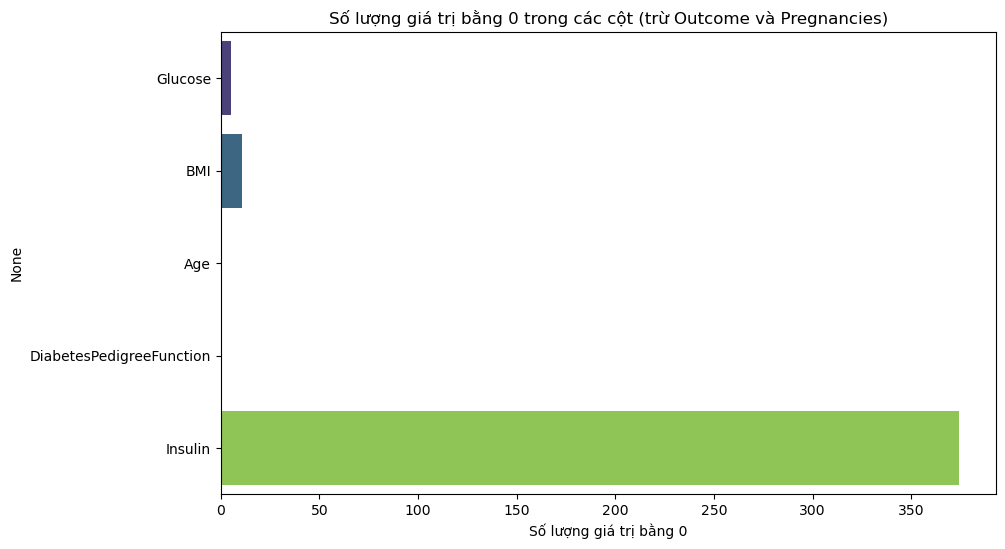

In [50]:
# Xem các giá trị bằng 0 trong các cột trừ Outcome và Pregnancies
zero_value_counts = (pima_data.drop(columns=['Outcome', 'Pregnancies']) == 0).sum()
print("Số lượng giá trị bằng 0 trong từng cột (trừ Outcome và Pregnancies):")
print(zero_value_counts)
# Vẽ biểu đồ cột ngang cho các giá trị bằng 0
plt.figure(figsize=(10, 6))
sns.barplot(x=zero_value_counts.values, y=zero_value_counts.index, palette='viridis', hue =zero_value_counts.index)
plt.xlabel('Số lượng giá trị bằng 0')
plt.title('Số lượng giá trị bằng 0 trong các cột (trừ Outcome và Pregnancies)')
plt.show()

In [51]:
# Thay thế các giá trị 0 trong cột Glucose, BMI, Insulin bằng giá trị trung vị
pima_data['Glucose'] = pima_data['Glucose'].replace(0, pima_data['Glucose'].median())
pima_data['BMI'] = pima_data['BMI'].replace(0, pima_data['BMI'].median())
pima_data['Insulin'] = pima_data['Insulin'].replace(0, pima_data['Insulin'].median())

In [52]:
# Xem lại số lượng giá trị bằng 0 sau khi thay thế
zero_value_counts_after = (pima_data.drop(columns=['Outcome', 'Pregnancies']) == 0).sum()
print("Số lượng giá trị bằng 0 trong từng cột sau khi thay thế (trừ Outcome và Pregnancies):")
print(zero_value_counts_after)

Số lượng giá trị bằng 0 trong từng cột sau khi thay thế (trừ Outcome và Pregnancies):
Glucose                     0
BMI                         0
Age                         0
DiabetesPedigreeFunction    0
Insulin                     0
dtype: int64


In [53]:
# Xem các giá trị bị thiếu trong từng cột
nan_counts = pima_data.isnull().sum()
print("Số lượng giá trị bị thiếu trong từng cột:")
print(nan_counts)

Số lượng giá trị bị thiếu trong từng cột:
Glucose                     0
BMI                         0
Age                         0
Pregnancies                 0
DiabetesPedigreeFunction    0
Insulin                     0
Outcome                     0
dtype: int64


**Kết luận**: Sau khi kiểm tra số lượng giá trị NaN trong từng cột của dữ liệu:  
- Tất cả các cột đều không có giá trị NaN (không có dữ liệu bị thiếu).
- Dữ liệu đầy đủ, không cần thực hiện thao tác thay thế hoặc loại bỏ giá trị thiếu.